In [1]:
from typing import Union

numeric = Union[int, float]     # Set union of numeric data type


"""
    This class represents graph Node contains heuristic score and node value
"""
class Node:
    """
        This method will create new Node with the given value and heuristic score

        @:param value: value of the node
        @:param heuristic_score: heuristic score

        @:return void
    """
    def __init__(self, value, heuristic_score: numeric):
        self.heuristicScore = heuristic_score
        self.value = value

    """
        This method will check if this node has lower value than other node
        By comparing their heuristic value
        
        @:param other: other node
        
        @:return true if this heuristic value is lower than others
    """
    def __lt__(self, other):
        return self.heuristicScore < other.heuristicScore

    """
        This method will check if this node has lower than or equal value to other node
        By comparing their heuristic value

        @:param other: other node

        @:return true if this heuristic value is lower than or equal to others
    """
    def __le__(self, other):
        return self.heuristicScore <= other.heuristicScore

    """
        This method will check if this node has greater value than other node
        By comparing their heuristic value

        @:param other: other node

        @:return true if this heuristic value is greater than others
    """
    def __gt__(self, other):
        return self.heuristicScore > other.heuristicScore

    """
        This method will check if this node has greater than or equal value to other node
        By comparing their heuristic value

        @:param other: other node

        @:return true if this heuristic value is greater than or equal to others
    """
    def __ge__(self, other):
        return self.heuristicScore >= other.heuristicScore

    """
        This method will check if this node has equal value to other node
        By comparing their heuristic score and their value

        @:param other: other node

        @:return true if its heuristic value and its value is the same as others 
    """
    def __eq__(self, other):
        return self.heuristicScore == other.heuristicScore and self.value == other.value

    """
        This method will check if this node has not equal value to other node
        By comparing their heuristic score and their value

        @:param other: other node

        @:return true if its heuristic value and its value is not the same as others 
    """
    def __ne__(self, other):
        return not self.__eq__(other)

    """
        This method will return key of the node
        
        @:returns its heuristic score, its value
    """
    def __key(self):
        return self.heuristicScore, self.value

    """
        This method will return hashcode of its key
        
        @:return hashed key of the node
    """
    def __hash__(self):
        return hash(self.__key())

    """
        This method will return string representation of this node
        
        @:return "{value} {heuristicScore}"
    """
    def __str__(self):
        return self.value.__str__() + ' ' + self.heuristicScore.__str__()


In [2]:
from typing import Union
from node import Node
from queue import PriorityQueue

INFINITY = float('inf')         # Set Infinity value
numeric = Union[int, float]     # Set union of numeric data type


"""
    This class represents graph data structure with adjacency list of vertices,
    also have search algorithm using Greedy Best First Search and A* Algorithm
"""
class Graph:
    """
        This method will create dictionary graph, that will contain
        each vertex as a key and its respective neighbour vertices as a value

        @:return void
    """
    def __init__(self):
        self.graph = {}

    """
        This method will create edge from one node to another with a cost
        
        @:param start: start node that will be connected to the end node
        @:param end: end node that will be connected to the start node
        @:param cost: cost of the edge, the default will be 0
        
        @:return void
    """
    def add_edge(self, start: Node, end: Node, cost: numeric = 0):
        # If start node is already in graph key ...
        if start in self.graph.keys():
            # ... Just append end node and cost as list element
            self.graph[start].append((end, cost))
        # If not ...
        else:
            # ... Create new key value pair
            self.graph[start] = [(end, cost)]

        # If end node is already in graph key ...
        if end in self.graph.keys():
            # ... Just append start node and cost as list element
            self.graph[end].append((start, cost))
        # If not ...
        else:
            # ... Create new key value pair
            self.graph[end] = [(start, cost)]

    """
        This method will find shortest path from the given source node to the given target node.
        This method use Greedy best first search.
        
        @:param source: source node that will be the start point of the search
        @:param target: target node that will be the end point of the search
        
        @:returns [total cost of the path, node list that represents path from source to target]
    """
    def gbfs(self, source: Node, target: Node):
        # Create dictionary consist of each node and its respective visited status
        # with default value of False as all node initially not visited yet
        visited = {x: False for x in self.graph.keys()}

        # Except for the source node, we visit this node at first
        visited[source] = True

        # Create new priority queue of node that will be visited
        # ordered by heuristic value from the lowest to the highest
        pq = PriorityQueue()

        # put the source node to the priority queue
        pq.put(source)

        # Create the cost map that will contain each node as a key
        # and a tuple as a value that consist of cost to that node
        # and which node the program reach that node from
        cost_map = {x: (INFINITY, None) for x in self.graph.keys()}

        # Set the source node value to (0, None) since there is no cost
        # to go to the source node this node is the first node to be visited
        cost_map[source] = (0, None)

        # Initiate variable found that indicate if the given problem is solvable or not
        found = False

        # Do the thing as long as the priority queue is not empty
        while not pq.empty():

            # Get the front data from priority queue and pop it
            current = pq.get()

            # If current node is already target node, then the problem is solved
            # so, get out of the loop
            if current == target:
                found = True
                break

            # Do the thing for each neighbour of current node
            for neighbour, cost in self.graph[current]:

                # if the neighbour is not visited yet ...
                if not visited[neighbour]:
                    # Then, visit it
                    visited[neighbour] = True

                    # and put it in the priority queue
                    pq.put(neighbour)

                    # and calculate the cost to the neighbour and store it to the cost map
                    cost_map[neighbour] = (cost_map[current][0] + cost, current)

        # If the target node is not found from the priority queue
        # Then the problem is unsolvable, return cost as None, and path as None
        if not found:
            return None, None

        # Get the cost and path from the cost map and given target node
        cost, path = Graph.__reconstruct_path(cost_map, target)

        # Then return the cost and path
        return cost, path

    """
        This method will find shortest path from the given source node to the given target node.
        This method use A* algorithm.
        
        @:param source: source node that will be the start point of the search
        @:param target: target node that will be the end point of the search
        
        @:returns [total cost of the path, node list that represents path from source to target]
    """
    def a_star(self, source, target):
        # Create the cost map that will contain each node as a key
        # and a tuple as a value that consist of cost to that node
        # and which node the program reach that node from
        min_cost = {x: (INFINITY, None) for x in self.graph.keys()}
        min_cost[source] = (0, None)

        # Create new priority queue of node that will be visited
        # ordered by evaluation score which is total cost to that node plus it's heuristic value
        # Sort from the lowest to the highest
        pq = PriorityQueue()
        pq.put((source.heuristicScore, 0, None, source))

        # Initiate variable found that indicate if the given problem is solvable or not
        found = False

        # Do the thing as long as the priority queue is not empty
        while not pq.empty():

            # Get the first element of priority queue and destructure to
            # _ -> heuristic, not used
            # prev_cost -> previous cost from source to current node
            # predecessor -> node before current node
            # current -> current node
            _, prev_cost, predecessor, current = pq.get()

            # If current node is already target node, then the problem is solved
            # so, get out of the loop
            if current == target:
                found = True
                break

            # Do the thing for each neighbour of current node
            for neighbour, cost_to_neighbour in self.graph[current]:

                # If the condition is met, then ...
                if current == source or (neighbour != predecessor and neighbour != source):

                    # calculate the total cost from source to the neighbour through current node
                    total_cost = prev_cost + cost_to_neighbour

                    # calculate evaluation score by sum up total cost and neighbour's heuristic score
                    fscore = total_cost + neighbour.heuristicScore

                    # If the total cost is less than current minimum cost to that node, then ...
                    if total_cost < min_cost[neighbour][0]:
                        # Change the minimum to current total cost, through current node
                        min_cost[neighbour] = (total_cost, current)

                        # Put the evaluation score, total cost to that neighbour, current node, and neighbour node
                        # as a tuple to the priority queue
                        pq.put((fscore, total_cost, current, neighbour))

        # If the target node is not found from the priority queue
        # Then the problem is unsolvable, return cost as None, and path as None
        if not found:
            return None, None

        # Get the cost and path from the cost map and given target node
        cost, path = Graph.__reconstruct_path(min_cost, target)

        # Then return the cost and path
        return cost, path

    """
        This method will backtrack the path from the given target,
        with help of cost map, until find the source node.
        
        @:param cost_map: minimum cost map that contains minimum cost from source to each node
        @:param target: target node
        
        @:returns [total cost, path from source to target]
    """
    @staticmethod
    def __reconstruct_path(cost_map, target):
        # Get the cost and previous node of target node from the cost map
        cost, prev = cost_map[target]

        # initiate path as array with target as first element
        path = [target]

        # Do the thing as long as previous node is not None
        while prev is not None:

            # insert previous node to the front
            path.insert(0, prev)

            # Get the previous node of the previous node
            _, prev = cost_map[prev]

        # return cost and path
        return cost, path


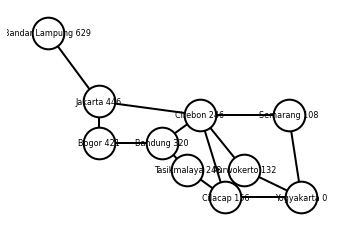

In [3]:
from node import Node
from graph import Graph

import matplotlib.pyplot as plt
import networkx as nx

graph1 = Graph()


bandar_lampung = Node('Bandar Lampung', 629)
jakarta = Node('Jakarta', 446)
bogor = Node('Bogor', 421)
bandung = Node('Bandung', 320)
cirebon = Node('Cirebon', 246)
tasikmalaya = Node('Tasikmalaya', 248)
purwokerto = Node('Purwokerto', 132)
cilacap = Node('Cilacap', 156)
semarang = Node('Semarang', 108)
yogyakarta = Node('Yogyakarta', 0)

graph1.add_edge(bandar_lampung, jakarta, 233)
graph1.add_edge(jakarta, bogor, 56)
graph1.add_edge(jakarta, cirebon, 219)
graph1.add_edge(bogor, bandung, 124)
graph1.add_edge(bandung, cirebon, 129)
graph1.add_edge(bandung, tasikmalaya, 111)
graph1.add_edge(tasikmalaya, cilacap, 144)
graph1.add_edge(cirebon, cilacap, 170)
graph1.add_edge(cirebon, purwokerto, 146)
graph1.add_edge(cirebon, semarang, 234)
graph1.add_edge(cilacap, purwokerto, 50)
graph1.add_edge(cilacap, yogyakarta, 172)
graph1.add_edge(purwokerto, yogyakarta, 168)
graph1.add_edge(semarang, yogyakarta, 130)

gbfs_cost, gbfs_path = graph1.gbfs(bandar_lampung, yogyakarta)
a_star_cost, a_star_path = graph1.a_star(bandar_lampung, yogyakarta)

G = nx.Graph()

pos = {
    bandar_lampung: (-4, 7),
    jakarta: (0, 4.5),
    cirebon: (8, 4),
    bogor: (0, 3),
    bandung: (5, 3),
    semarang: (15, 4),
    purwokerto: (11.5, 2),
    tasikmalaya: (7, 2),
    cilacap: (10, 1),
    yogyakarta: (16, 1)
}

for key, value in graph1.graph.items():
    for neighbour in value:
        G.add_edge(key, neighbour[0], weight=neighbour[1])

options = {
    "font_size": 8,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}
nx.draw_networkx(G, pos, **options)

ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()





